#Entregable 1
## Preprocessing BMW Dataset


In [2]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OneHotEncoder

In [3]:
#Importación del dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bmw_pricing_v3.csv')

### Exploración de variables (Valores nulos)

In [4]:
#Proyectaremos un display de las primeras filas del dataset para visualizar que encontramos en ellas
df.head()

marca modelo        km  potencia fecha_registro tipo_gasolina   color  \
0   NaN    118  140411.0     100.0     2012-02-01        diesel   black   
1   BMW     M4   13929.0     317.0            NaN        petrol    grey   
2   BMW    320  183297.0     120.0     2012-04-01        diesel   white   
3   BMW    420  128035.0     135.0            NaN        diesel     red   
4   BMW    425   97097.0     160.0            NaN        diesel  silver   

    tipo_coche volante_regulable aire_acondicionado camara_trasera  \
0          NaN              True               True          False   
1  convertible              True               True          False   
2          NaN             False              False          False   
3  convertible              True               True          False   
4          NaN              True               True          False   

  asientos_traseros_plegables elevalunas_electrico bluetooth   gps  \
0                         NaN                 True       NaN  True   
1                         NaN                False      True  True   
2                         NaN                 True     False  True   
3                         NaN                 True      True  True   
4                       False                False      True  True   

  alerta_lim_velocidad   precio fecha_venta  
0                  NaN  11300.0  2018-01-01  
1                 True  69700.0  2018-02-01  
2                False  10200.0  2018-02-01  
3                  NaN  25100.0  2018-02-01  
4                 True  33400.0  2018-04-01

In [5]:
#Display de la cantidad de valores que encontramos en el dataset así como la cantidad de ellos que son nulos y la categoría de las variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [6]:
#Veremos la cantidad exacta de nulos por variable
df.isna().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [7]:
#Durante el notebook iremos generando copias por si necesitamos volver a algún paso anterior
df2 = df.copy()

In [8]:
#Comprovamos que no haya filas duplicadas
df2.duplicated().value_counts()

False    4843
dtype: int64

In [9]:
#Pasaremos las variables de tiempo a formato datetime, para poder operar adecuadamente con ellas
lista = ['fecha_registro', 'fecha_venta']
for i in lista:
  df2[i] = pd.to_datetime(df2[i])

In [10]:
#Crearemos la variable antiguedad para saber la edad de los vehiculos
df2['antiguedad'] = df2['fecha_venta'] - df2['fecha_registro']
df2['antiguedad']

0      2161 days
1            NaT
2      2132 days
3            NaT
4            NaT
          ...   
4838         NaT
4839   1157 days
4840   1066 days
4841    883 days
4842         NaT
Name: antiguedad, Length: 4843, dtype: timedelta64[ns]

In [11]:
#La pasamos de dias a años
df2['antiguedad'] = df2['antiguedad']/np.timedelta64(1, 'Y')
df2['antiguedad']

0       5.916617
1            NaN
2       5.837218
3            NaN
4            NaN
          ...   
4838         NaN
4839    3.167758
4840    2.918609
4841    2.417572
4842         NaN
Name: antiguedad, Length: 4843, dtype: float64

In [12]:
#Separaremos las variables en formato fecha completa para ver si tienen impacto en el dataset
for col in ['fecha_registro', 'fecha_venta']:
  df2[col + '_nombredia'] = df2[col].dt.day_name()
  df2[col + '_año'] = df2[col].dt.year
  df2[col + '_dia'] = df2[col].dt.day
  df2[col + '_mes'] = df2[col].dt.month

In [13]:
df2['año_registro'] = df2['fecha_venta_año'] - df2['antiguedad'].round(0)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [15]:
df2.head()

marca modelo        km  potencia fecha_registro tipo_gasolina   color  \
0   NaN    118  140411.0     100.0     2012-02-01        diesel   black   
1   BMW     M4   13929.0     317.0            NaT        petrol    grey   
2   BMW    320  183297.0     120.0     2012-04-01        diesel   white   
3   BMW    420  128035.0     135.0            NaT        diesel     red   
4   BMW    425   97097.0     160.0            NaT        diesel  silver   

    tipo_coche volante_regulable aire_acondicionado  ... antiguedad  \
0          NaN              True               True  ...   5.916617   
1  convertible              True               True  ...        NaN   
2          NaN             False              False  ...   5.837218   
3  convertible              True               True  ...        NaN   
4          NaN              True               True  ...        NaN   

  fecha_registro_nombredia fecha_registro_año fecha_registro_dia  \
0                Wednesday             2012.0                1.0   
1                      NaN                NaN                NaN   
2                   Sunday             2012.0                1.0   
3                      NaN                NaN                NaN   
4                      NaN                NaN                NaN   

   fecha_registro_mes fecha_venta_nombredia  fecha_venta_año fecha_venta_dia  \
0                 2.0                Monday           2018.0             1.0   
1                 NaN              Thursday           2018.0             1.0   
2                 4.0              Thursday           2018.0             1.0   
3                 NaN              Thursday           2018.0             1.0   
4                 NaN                Sunday           2018.0             1.0   

   fecha_venta_mes año_registro  
0              1.0       2012.0  
1              2.0          NaN  
2              2.0       2012.0  
3              2.0          NaN  
4              4.0          NaN  

[5 rows x 28 columns]

In [16]:
#Eliminaremos alguna variable que valoramos que ya no nos son utiles para predecir el precio
lista_del = ['marca', 'fecha_registro', 'fecha_venta', 'asientos_traseros_plegables']
for i in lista_del:
  del(df2[i])

In [17]:
#Comprobamos
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modelo                    4840 non-null   object 
 1   km                        4841 non-null   float64
 2   potencia                  4842 non-null   float64
 3   tipo_gasolina             4838 non-null   object 
 4   color                     4398 non-null   object 
 5   tipo_coche                3383 non-null   object 
 6   volante_regulable         4839 non-null   object 
 7   aire_acondicionado        4357 non-null   object 
 8   camara_trasera            4841 non-null   object 
 9   elevalunas_electrico      4841 non-null   object 
 10  bluetooth                 4115 non-null   object 
 11  gps                       4843 non-null   bool   
 12  alerta_lim_velocidad      4115 non-null   object 
 13  precio                    4837 non-null   float64
 14  antigued

In [18]:
df2.isnull().sum()

modelo                         3
km                             2
potencia                       1
tipo_gasolina                  5
color                        445
tipo_coche                  1460
volante_regulable              4
aire_acondicionado           486
camara_trasera                 2
elevalunas_electrico           2
bluetooth                    728
gps                            0
alerta_lim_velocidad         728
precio                         6
antiguedad                  2423
fecha_registro_nombredia    2423
fecha_registro_año          2423
fecha_registro_dia          2423
fecha_registro_mes          2423
fecha_venta_nombredia          1
fecha_venta_año                1
fecha_venta_dia                1
fecha_venta_mes                1
año_registro                2423
dtype: int64

In [19]:
df3 = df2.copy()

In [20]:
#Eliminaremos los nulos de las variables que presentan pocas, ya que no será relevante para el dataset
lista_null = ['modelo', 'km', 'potencia', 'tipo_gasolina', 'volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'precio']
for i in lista_null:
  df3.dropna(subset=lista_null, inplace=True)

In [21]:
df3.isna().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                        442
tipo_coche                  1450
volante_regulable              0
aire_acondicionado           482
camara_trasera                 0
elevalunas_electrico           0
bluetooth                    725
gps                            0
alerta_lim_velocidad         725
precio                         0
antiguedad                  2410
fecha_registro_nombredia    2410
fecha_registro_año          2410
fecha_registro_dia          2410
fecha_registro_mes          2410
fecha_venta_nombredia          1
fecha_venta_año                1
fecha_venta_dia                1
fecha_venta_mes                1
año_registro                2410
dtype: int64

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4842
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modelo                    4818 non-null   object 
 1   km                        4818 non-null   float64
 2   potencia                  4818 non-null   float64
 3   tipo_gasolina             4818 non-null   object 
 4   color                     4376 non-null   object 
 5   tipo_coche                3368 non-null   object 
 6   volante_regulable         4818 non-null   object 
 7   aire_acondicionado        4336 non-null   object 
 8   camara_trasera            4818 non-null   object 
 9   elevalunas_electrico      4818 non-null   object 
 10  bluetooth                 4093 non-null   object 
 11  gps                       4818 non-null   bool   
 12  alerta_lim_velocidad      4093 non-null   object 
 13  precio                    4818 non-null   float64
 14  antigued

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

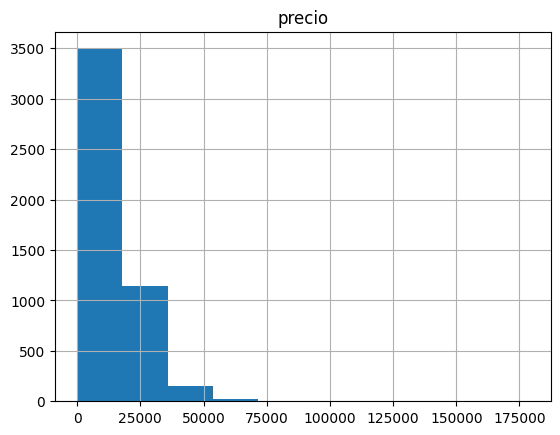

In [23]:
df3.hist('precio')

In [24]:
df3[df3['precio'] <= 0]

Empty DataFrame
Columns: [modelo, km, potencia, tipo_gasolina, color, tipo_coche, volante_regulable, aire_acondicionado, camara_trasera, elevalunas_electrico, bluetooth, gps, alerta_lim_velocidad, precio, antiguedad, fecha_registro_nombredia, fecha_registro_año, fecha_registro_dia, fecha_registro_mes, fecha_venta_nombredia, fecha_venta_año, fecha_venta_dia, fecha_venta_mes, año_registro]
Index: []

[0 rows x 24 columns]

In [25]:
df3['color'].value_counts()

black     1489
grey      1067
blue       643
white      480
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64

In [26]:
df3['color'].value_counts(normalize=True)

black     0.340265
grey      0.243830
blue      0.146938
white     0.109689
brown     0.069013
silver    0.066499
red       0.010740
beige     0.008455
green     0.003199
orange    0.001371
Name: color, dtype: float64

In [27]:
df3[df3['color'].isna()]

modelo        km  potencia tipo_gasolina color   tipo_coche  \
14                  120  174631.0     120.0        diesel   NaN  convertible   
18                  325  205474.0     145.0        diesel   NaN          NaN   
25                  318  196092.0      85.0        petrol   NaN  convertible   
36                  318  187294.0     105.0        petrol   NaN  convertible   
47                  420   20996.0     135.0        petrol   NaN        coupe   
...                 ...       ...       ...           ...   ...          ...   
4757                 X4   61989.0     140.0        diesel   NaN          NaN   
4777                 X5  285669.0     173.0        diesel   NaN          NaN   
4805  218 Active Tourer   35382.0     110.0        diesel   NaN          van   
4818                 X3  110039.0     130.0        diesel   NaN          NaN   
4825  225 Active Tourer   33300.0     170.0        petrol   NaN          van   

     volante_regulable aire_acondicionado camara_trasera elevalunas_electrico  \
14                True               True          False                False   
18                True               True          False                 True   
25                True              False          False                False   
36                True              False          False                False   
47                True              False          False                 True   
...                ...                ...            ...                  ...   
4757             False              False          False                False   
4777              True               True          False                 True   
4805             False                NaN          False                False   
4818             False                NaN          False                False   
4825              True               True          False                False   

      ... antiguedad  fecha_registro_nombredia fecha_registro_año  \
14    ...   9.245912                  Thursday             2009.0   
18    ...   8.917363                    Friday             2009.0   
25    ...  22.582257                    Sunday             1995.0   
36    ...        NaN                       NaN                NaN   
47    ...   3.917945                  Thursday             2014.0   
...   ...        ...                       ...                ...   
4757  ...   3.750933                    Monday             2014.0   
4777  ...  11.085785                 Wednesday             2007.0   
4805  ...        NaN                       NaN                NaN   
4818  ...   8.832488                 Wednesday             2009.0   
4825  ...        NaN                       NaN                NaN   

      fecha_registro_dia  fecha_registro_mes fecha_venta_nombredia  \
14                   1.0                 1.0                Sunday   
18                   1.0                 5.0                Sunday   
25                   1.0                10.0               Tuesday   
36                   NaN                 NaN                Friday   
47                   1.0                 5.0                Sunday   
...                  ...                 ...                   ...   
4757                 1.0                12.0              Saturday   
4777                 1.0                 8.0              Saturday   
4805                 NaN                 NaN              Thursday   
4818                 1.0                 7.0               Tuesday   
4825                 NaN                 NaN               Tuesday   

      fecha_venta_año  fecha_venta_dia  fecha_venta_mes año_registro  
14             2018.0              1.0              4.0       2009.0  
18             2018.0              1.0              4.0       2009.0  
25             2018.0              1.0              5.0       1995.0  
36             2018.0              1.0              6.0          NaN  
47             2018.0              1.0              4.0   

In [28]:
#Reseteamos el índice porque antes hemos eliminado nulos y hace que se desajuste
df3.reset_index(inplace=True, drop=True)

In [29]:
#Genero una función para la limpieza de nulos, quiero mantener las distribuciones originales así que
#creamos una func¡ón para que asigne el mismo porcentaje del total de nulos que del total de la distribución
def nan_distribution(df, columna):
  total_nan = df[columna].isna().sum()
  distribucion = df[columna].value_counts(normalize=True)

  for valor, prop in distribucion.items():
      cantidad_nulos = round(prop * total_nan)
      indices_nulos = df.index[df[columna].isna()].tolist()

      for idx in indices_nulos:
          if cantidad_nulos > 0:
              df.at[idx, columna] = valor
              cantidad_nulos -= 1
          else:
              break

  # Manejar cualquier residuo
  if cantidad_nulos > 0:
      residuos = df.index[df[columna].isna()].tolist()
      for idx in residuos[:cantidad_nulos]:
          df.at[idx, columna] = valor
          cantidad_nulos -= 1

In [30]:
nan_distribution(df3, 'color')

In [31]:
df3['color'].value_counts()

black     1639
grey      1175
blue       708
white      528
brown      333
silver     320
red         52
beige       41
green       15
orange       7
Name: color, dtype: int64

In [32]:
df3.isna().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                  1450
volante_regulable              0
aire_acondicionado           482
camara_trasera                 0
elevalunas_electrico           0
bluetooth                    725
gps                            0
alerta_lim_velocidad         725
precio                         0
antiguedad                  2410
fecha_registro_nombredia    2410
fecha_registro_año          2410
fecha_registro_dia          2410
fecha_registro_mes          2410
fecha_venta_nombredia          1
fecha_venta_año                1
fecha_venta_dia                1
fecha_venta_mes                1
año_registro                2410
dtype: int64

In [33]:
df3['color'].value_counts()

black     1639
grey      1175
blue       708
white      528
brown      333
silver     320
red         52
beige       41
green       15
orange       7
Name: color, dtype: int64

In [34]:
df3.isna().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                  1450
volante_regulable              0
aire_acondicionado           482
camara_trasera                 0
elevalunas_electrico           0
bluetooth                    725
gps                            0
alerta_lim_velocidad         725
precio                         0
antiguedad                  2410
fecha_registro_nombredia    2410
fecha_registro_año          2410
fecha_registro_dia          2410
fecha_registro_mes          2410
fecha_venta_nombredia          1
fecha_venta_año                1
fecha_venta_dia                1
fecha_venta_mes                1
año_registro                2410
dtype: int64

In [35]:
df3['tipo_coche'].value_counts()

estate         1097
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            73
convertible      30
van              28
Name: tipo_coche, dtype: int64

In [36]:
df3['tipo_coche'].value_counts(normalize=True)

estate         0.325713
sedan          0.243765
suv            0.223872
hatchback      0.144893
subcompact     0.022862
coupe          0.021675
convertible    0.008907
van            0.008314
Name: tipo_coche, dtype: float64

In [37]:
nan_distribution(df3, 'tipo_coche')

In [38]:
df3['tipo_coche'].value_counts()

estate         1569
sedan          1174
suv            1079
hatchback       698
subcompact      110
coupe           104
convertible      43
van              40
Name: tipo_coche, dtype: int64

In [39]:
df3.isna().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                     1
volante_regulable              0
aire_acondicionado           482
camara_trasera                 0
elevalunas_electrico           0
bluetooth                    725
gps                            0
alerta_lim_velocidad         725
precio                         0
antiguedad                  2410
fecha_registro_nombredia    2410
fecha_registro_año          2410
fecha_registro_dia          2410
fecha_registro_mes          2410
fecha_venta_nombredia          1
fecha_venta_año                1
fecha_venta_dia                1
fecha_venta_mes                1
año_registro                2410
dtype: int64

In [40]:
#Al parecer la función tiene algún error que no he podido soluciona, ese único nulo que queda lo eliminaremos
df3.dropna(subset='tipo_coche', inplace=True)
df3.reset_index(inplace=True, drop=True)

In [41]:
nan_distribution(df3, 'aire_acondicionado')
nan_distribution(df3, 'bluetooth')
nan_distribution(df3, 'alerta_lim_velocidad')

In [42]:
df3.isna().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
antiguedad                  2409
fecha_registro_nombredia    2409
fecha_registro_año          2409
fecha_registro_dia          2409
fecha_registro_mes          2409
fecha_venta_nombredia          1
fecha_venta_año                1
fecha_venta_dia                1
fecha_venta_mes                1
año_registro                2409
dtype: int64

In [43]:
df3.head(5)

modelo        km  potencia tipo_gasolina   color   tipo_coche  \
0    118  140411.0     100.0        diesel   black       estate   
1     M4   13929.0     317.0        petrol    grey  convertible   
2    320  183297.0     120.0        diesel   white       estate   
3    420  128035.0     135.0        diesel     red  convertible   
4    425   97097.0     160.0        diesel  silver       estate   

  volante_regulable aire_acondicionado camara_trasera elevalunas_electrico  \
0              True               True          False                 True   
1              True               True          False                False   
2             False              False          False                 True   
3              True               True          False                 True   
4              True               True          False                False   

   ... antiguedad  fecha_registro_nombredia fecha_registro_año  \
0  ...   5.916617                 Wednesday             2012.0   
1  ...        NaN                       NaN                NaN   
2  ...   5.837218                    Sunday             2012.0   
3  ...        NaN                       NaN                NaN   
4  ...        NaN                       NaN                NaN   

   fecha_registro_dia  fecha_registro_mes fecha_venta_nombredia  \
0                 1.0                 2.0                Monday   
1                 NaN                 NaN              Thursday   
2                 1.0                 4.0              Thursday   
3                 NaN                 NaN              Thursday   
4                 NaN                 NaN                Sunday   

   fecha_venta_año  fecha_venta_dia  fecha_venta_mes año_registro  
0           2018.0              1.0              1.0       2012.0  
1           2018.0              1.0              2.0          NaN  
2           2018.0              1.0              2.0       2012.0  
3           2018.0              1.0              2.0          NaN  
4           2018.0              1.0              4.0          NaN  

[5 rows x 24 columns]

In [44]:
df3['año_registro'].value_counts()

2013.0    705
2014.0    693
2012.0    374
2015.0    196
2011.0    113
2016.0     65
2010.0     46
2009.0     41
2008.0     38
2006.0     31
2007.0     31
2005.0     24
2017.0      9
2004.0      9
2001.0      8
2003.0      8
2002.0      4
2000.0      4
1997.0      4
1999.0      2
1995.0      1
1990.0      1
1994.0      1
Name: año_registro, dtype: int64

In [45]:
nan_distribution(df3, 'año_registro')

In [46]:
df3.isna().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
antiguedad                  2409
fecha_registro_nombredia    2409
fecha_registro_año          2409
fecha_registro_dia          2409
fecha_registro_mes          2409
fecha_venta_nombredia          1
fecha_venta_año                1
fecha_venta_dia                1
fecha_venta_mes                1
año_registro                   1
dtype: int64

In [47]:
del(df3['fecha_registro_año'])
df3.dropna(subset=['fecha_venta_año', 'año_registro'], inplace=True)

In [48]:
df3.isna().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
antiguedad                  2407
fecha_registro_nombredia    2407
fecha_registro_dia          2407
fecha_registro_mes          2407
fecha_venta_nombredia          0
fecha_venta_año                0
fecha_venta_dia                0
fecha_venta_mes                0
año_registro                   0
dtype: int64

In [49]:
df3['antiguedad'].fillna(df3['fecha_venta_año'] - df3['año_registro'], inplace=True)
df3['antiguedad'] = df3['antiguedad'].round(0)

In [50]:
df3.isna().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
antiguedad                     0
fecha_registro_nombredia    2407
fecha_registro_dia          2407
fecha_registro_mes          2407
fecha_venta_nombredia          0
fecha_venta_año                0
fecha_venta_dia                0
fecha_venta_mes                0
año_registro                   0
dtype: int64

In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 0 to 4816
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modelo                    4815 non-null   object 
 1   km                        4815 non-null   float64
 2   potencia                  4815 non-null   float64
 3   tipo_gasolina             4815 non-null   object 
 4   color                     4815 non-null   object 
 5   tipo_coche                4815 non-null   object 
 6   volante_regulable         4815 non-null   object 
 7   aire_acondicionado        4815 non-null   object 
 8   camara_trasera            4815 non-null   object 
 9   elevalunas_electrico      4815 non-null   object 
 10  bluetooth                 4815 non-null   object 
 11  gps                       4815 non-null   bool   
 12  alerta_lim_velocidad      4815 non-null   object 
 13  precio                    4815 non-null   float64
 14  antigued

In [52]:
list_to_bool = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'alerta_lim_velocidad']
list_to_dt = ['fecha_venta_año', 'año_registro']
list_to_int = ['km', 'potencia', 'antiguedad', 'precio']

In [53]:
for i in list_to_bool:
  df3[i] = df[i].astype(bool)

In [54]:
for i in list_to_dt:
  df3[i] = pd.to_datetime(df3[i], format='%Y').dt.year

In [55]:
df3['km'] = df3['km'].astype(int)
df3['potencia'] = df3['potencia'].astype(int)
df3['precio'] = df3['precio'].astype(int)
df3['antiguedad'] = df3['antiguedad'].astype(int)

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 0 to 4816
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modelo                    4815 non-null   object 
 1   km                        4815 non-null   int64  
 2   potencia                  4815 non-null   int64  
 3   tipo_gasolina             4815 non-null   object 
 4   color                     4815 non-null   object 
 5   tipo_coche                4815 non-null   object 
 6   volante_regulable         4815 non-null   bool   
 7   aire_acondicionado        4815 non-null   bool   
 8   camara_trasera            4815 non-null   bool   
 9   elevalunas_electrico      4815 non-null   bool   
 10  bluetooth                 4815 non-null   bool   
 11  gps                       4815 non-null   bool   
 12  alerta_lim_velocidad      4815 non-null   bool   
 13  precio                    4815 non-null   int64  
 14  antigued

In [57]:
#Eliminaremos las variables que generamos con las fechas porque tienen demasiados nulos
lista_del2 = ['fecha_registro_nombredia', 'fecha_registro_dia', 'fecha_registro_mes']
for i in lista_del2:
  del(df3[i])

In [58]:
df3.head(5)

modelo      km  potencia tipo_gasolina   color   tipo_coche  \
0    118  140411       100        diesel   black       estate   
1     M4   13929       317        petrol    grey  convertible   
2    320  183297       120        diesel   white       estate   
3    420  128035       135        diesel     red  convertible   
4    425   97097       160        diesel  silver       estate   

   volante_regulable  aire_acondicionado  camara_trasera  \
0               True                True           False   
1               True                True           False   
2              False               False           False   
3               True                True           False   
4               True                True           False   

   elevalunas_electrico  bluetooth   gps  alerta_lim_velocidad  precio  \
0                  True       True  True                  True   11300   
1                 False       True  True                  True   69700   
2                  True      False  True                 False   10200   
3                  True       True  True                  True   25100   
4                 False       True  True                  True   33400   

   antiguedad fecha_venta_nombredia  fecha_venta_año  fecha_venta_dia  \
0           6                Monday             2018              1.0   
1           5              Thursday             2018              1.0   
2           6              Thursday             2018              1.0   
3           5              Thursday             2018              1.0   
4           5                Sunday             2018              1.0   

   fecha_venta_mes  año_registro  
0              1.0          2012  
1              2.0          2013  
2              2.0          2012  
3              2.0          2013  
4              4.0          2013

### Exploración de variables (outliers)

In [59]:
df4 = df3.copy()

modelo 
 320                747
520                630
318                562
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 diesel           4608
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64 

color 
 black     1638
grey      1174
blue       708
white      528
brown      333
silver     319
red         52
beige       41
green       15
orange       7
Name: color, dtype: int64 

tipo_coche 
 estate         1568
sedan          1174
suv            1079
hatchback       698
subcompact      110
coupe           104
convertible      43
van              39
Name: tipo_coche, dtype: int64 

[[<Axes: title={'center': 'precio'}>]]
[[<Axes: title={'center': 'a

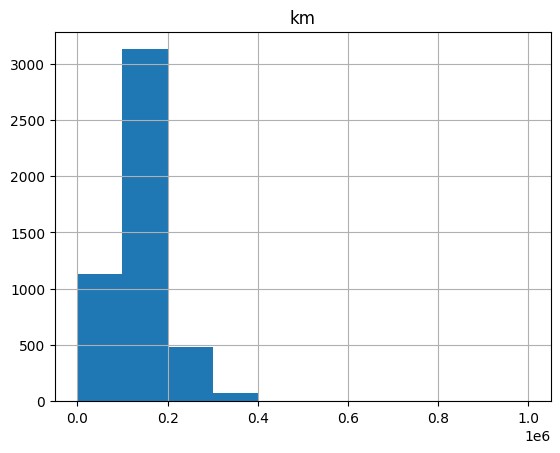

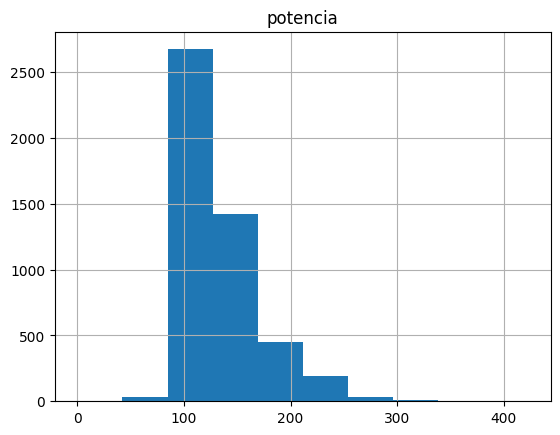

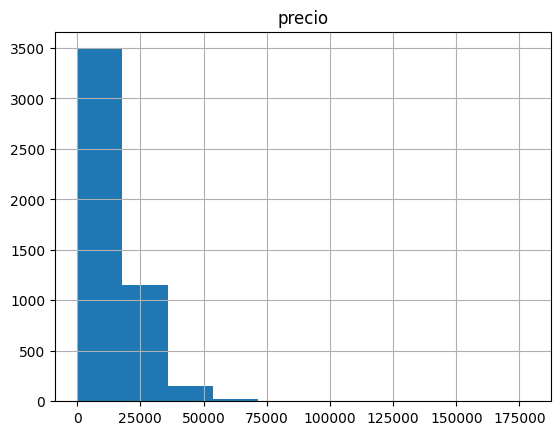

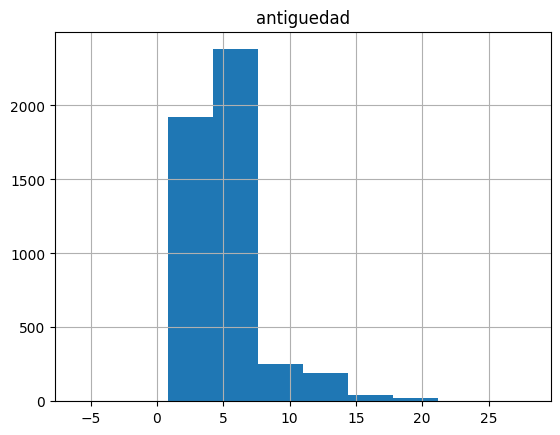

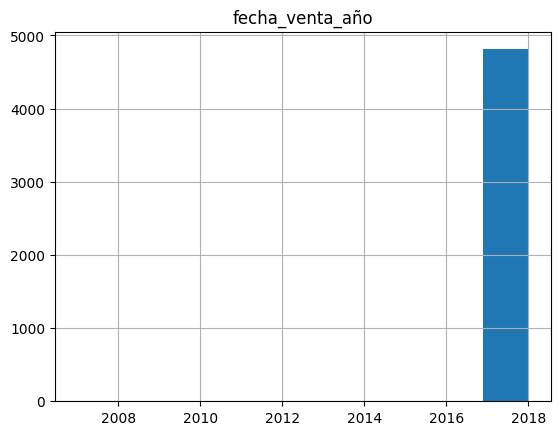

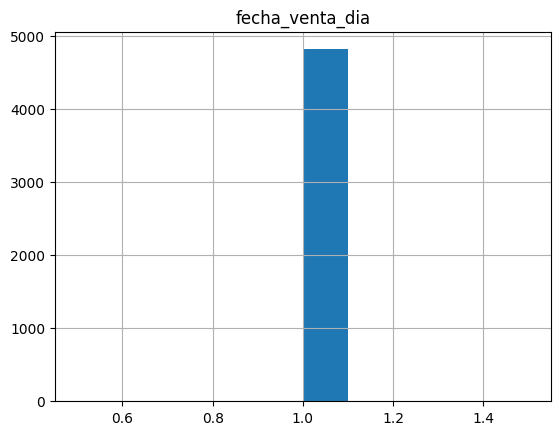

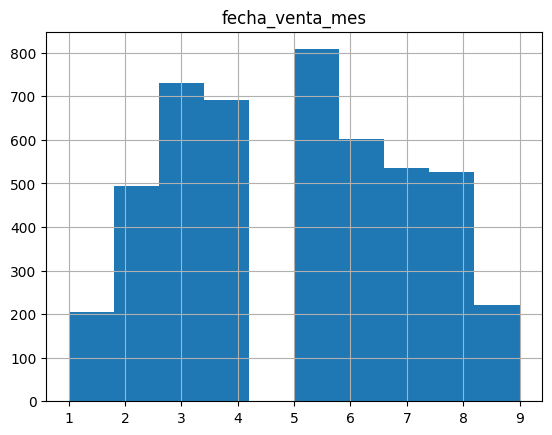

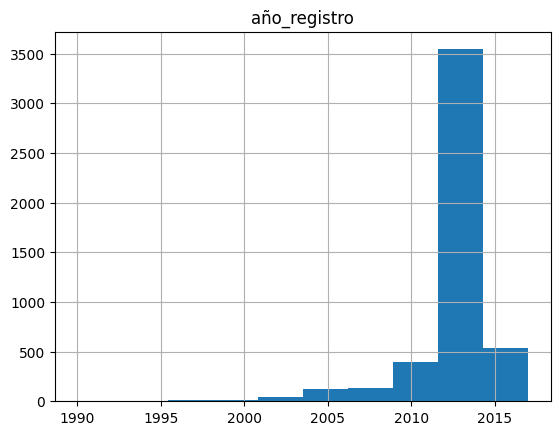

In [60]:
#Visualizaremos todos los elementos, tanto descriptivos como en visualización
for i in df4:
  if df4[i].dtype.kind == "O":
    print(i,'\n', df4[i].value_counts(), '\n')
  elif (df4[i].dtype.kind=="f") or (df4[i].dtype.kind=="i"):
    print(df4.hist(i))

In [61]:
df4['tipo_gasolina'] = np.where(df4['tipo_gasolina'] == 'Diesel', 'diesel', df4['tipo_gasolina'])

In [62]:
df4['tipo_gasolina'].value_counts()

diesel           4613
petrol            191
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64

In [63]:
df4[df4['km'] < 1000]

modelo   km  potencia tipo_gasolina  color tipo_coche  \
2387  420 Gran Coupé  476       120        diesel   blue  hatchback   
2916  640 Gran Coupé  -64       230        diesel  black      sedan   
3913              X5  706       155        diesel  black        suv   
4350              X5  612       183        diesel  black        suv   

      volante_regulable  aire_acondicionado  camara_trasera  \
2387              False               False           False   
2916               True               False           False   
3913              False                True           False   
4350              False                True            True   

      elevalunas_electrico  bluetooth   gps  alerta_lim_velocidad  precio  \
2387                 False      False  True                  True   30300   
2916                 False      False  True                 False   75000   
3913                 False      False  True                 False   41600   
4350                  True      False  True                  True   49100   

      antiguedad fecha_venta_nombredia  fecha_venta_año  fecha_venta_dia  \
2387           4             Wednesday             2018              1.0   
2916           6                Sunday             2018              1.0   
3913           1              Thursday             2018              1.0   
4350           2                Friday             2018              1.0   

      fecha_venta_mes  año_registro  
2387              8.0          2014  
2916              4.0          2012  
3913              2.0          2017  
4350              6.0          2016

In [64]:
df4 = df4[df4['km'] > 0]

In [65]:
df4.head(5)

modelo      km  potencia tipo_gasolina   color   tipo_coche  \
0    118  140411       100        diesel   black       estate   
1     M4   13929       317        petrol    grey  convertible   
2    320  183297       120        diesel   white       estate   
3    420  128035       135        diesel     red  convertible   
4    425   97097       160        diesel  silver       estate   

   volante_regulable  aire_acondicionado  camara_trasera  \
0               True                True           False   
1               True                True           False   
2              False               False           False   
3               True                True           False   
4               True                True           False   

   elevalunas_electrico  bluetooth   gps  alerta_lim_velocidad  precio  \
0                  True       True  True                  True   11300   
1                 False       True  True                  True   69700   
2                  True      False  True                 False   10200   
3                  True       True  True                  True   25100   
4                 False       True  True                  True   33400   

   antiguedad fecha_venta_nombredia  fecha_venta_año  fecha_venta_dia  \
0           6                Monday             2018              1.0   
1           5              Thursday             2018              1.0   
2           6              Thursday             2018              1.0   
3           5              Thursday             2018              1.0   
4           5                Sunday             2018              1.0   

   fecha_venta_mes  año_registro  
0              1.0          2012  
1              2.0          2013  
2              2.0          2012  
3              2.0          2013  
4              4.0          2013

In [66]:
df4[df4['potencia'] < 50]

modelo      km  potencia  tipo_gasolina  color tipo_coche  \
1774     i3  152328        25  hybrid_petrol  black      sedan   
1903     i3  152470        25  hybrid_petrol  black  hatchback   
3743     X1   81770         0         diesel  white        suv   

      volante_regulable  aire_acondicionado  camara_trasera  \
1774              False               False           False   
1903               True                True            True   
3743               True                True           False   

      elevalunas_electrico  bluetooth    gps  alerta_lim_velocidad  precio  \
1774                  True       True   True                 False   20300   
1903                  True      False   True                  True   15500   
3743                 False       True  False                  True   11700   

      antiguedad fecha_venta_nombredia  fecha_venta_año  fecha_venta_dia  \
1774           4                Sunday             2018              1.0   
1903           4              Thursday             2018              1.0   
3743           3              Thursday             2018              1.0   

      fecha_venta_mes  año_registro  
1774              4.0          2014  
1903              3.0          2014  
3743              3.0          2015

In [67]:
df4 = df4[df4['potencia'] > 50]

In [68]:
df4[df4['antiguedad'] < 1]

modelo      km  potencia tipo_gasolina  color   tipo_coche  \
42     330  142483       180        diesel   blue  convertible   
97     320  342768       135        diesel  black       estate   
175    320  181052       120        diesel  black       estate   
249    316  201102        85        diesel  black       estate   

     volante_regulable  aire_acondicionado  camara_trasera  \
42                True                True           False   
97                True                True           False   
175              False               False           False   
249              False               False           False   

     elevalunas_electrico  bluetooth   gps  alerta_lim_velocidad  precio  \
42                   True      False  True                  True   15800   
97                  False       True  True                 False    8200   
175                 False      False  True                  True   11500   
249                 False      False  True                  True    8800   

     antiguedad fecha_venta_nombredia  fecha_venta_año  fecha_venta_dia  \
42           -6             Wednesday             2007              1.0   
97           -2              Thursday             2010              1.0   
175          -4             Wednesday             2009              1.0   
249          -6                Sunday             2008              1.0   

     fecha_venta_mes  año_registro  
42               8.0          2013  
97               4.0          2012  
175              4.0          2013  
249              6.0          2014

In [69]:
df4 = df4[df4['antiguedad'] > 1]

modelo 
 320                745
520                630
318                561
X3                 432
116                356
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 diesel           4589
petrol            191
hybrid_petrol       6
electro             3
Name: tipo_gasolina, dtype: int64 

color 
 black     1626
grey      1169
blue       703
white      525
brown      333
silver     319
red         52
beige       41
green       14
orange       7
Name: color, dtype: int64 

tipo_coche 
 estate         1563
sedan          1172
suv            1069
hatchback       695
subcompact      109
coupe           100
convertible      42
van              39
Name: tipo_coche, dtype: int64 

[[<Axes: title={'center': 'precio'}>]]
[[<Axes: title={'center': 'antiguedad'}>]]
fecha_v

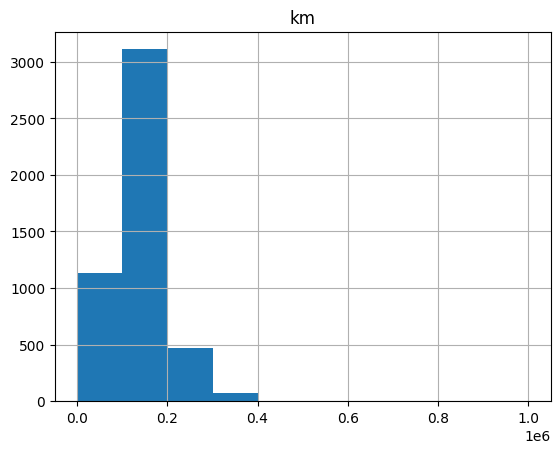

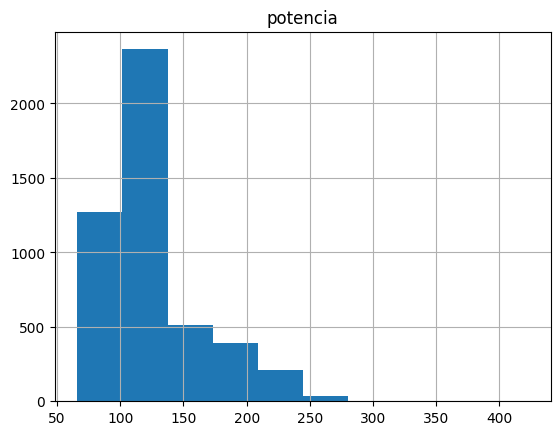

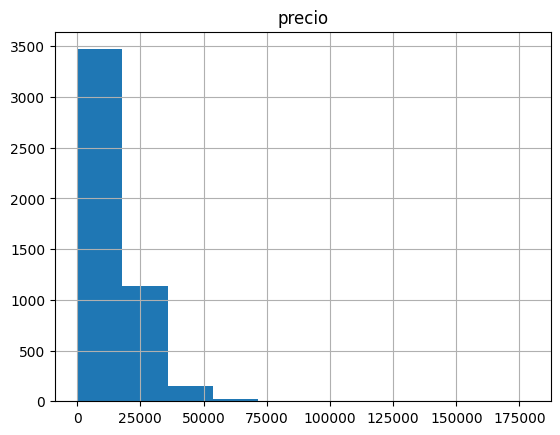

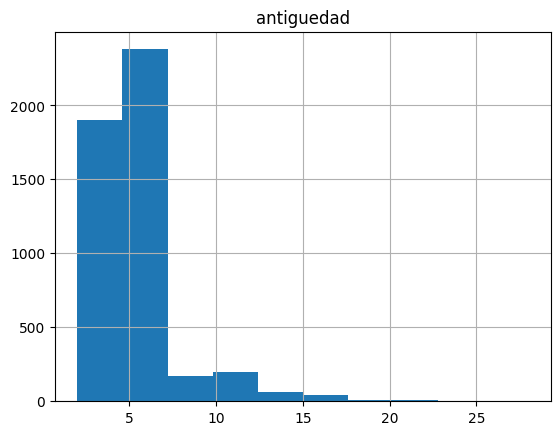

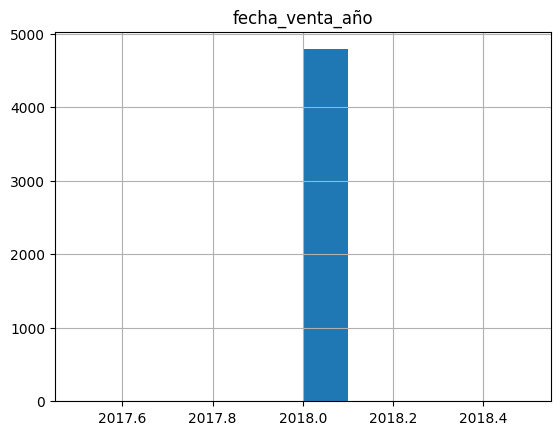

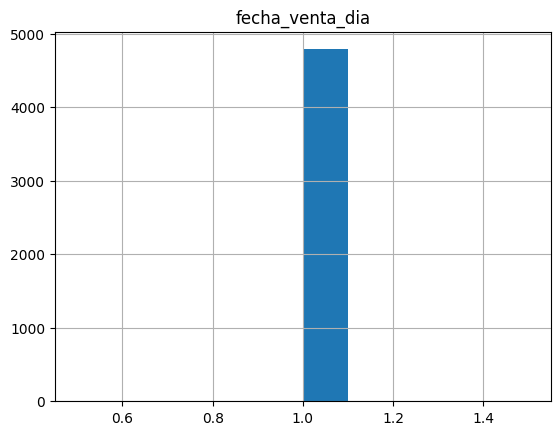

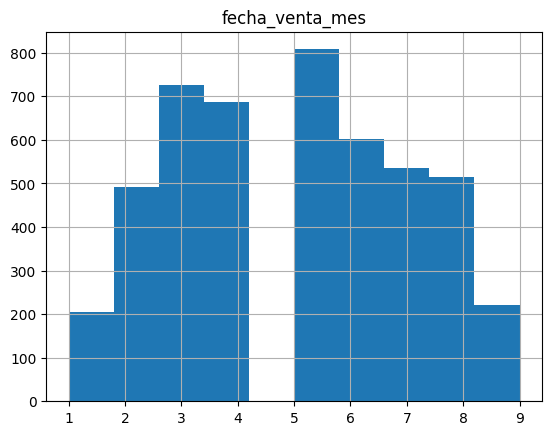

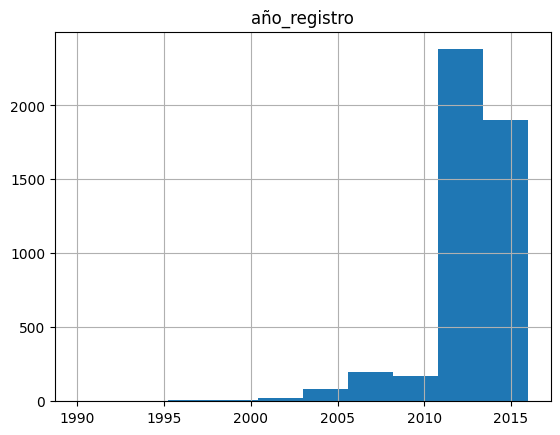

In [70]:
#Una vez realizados algunos ajustes, volveremos a ver la representación
for i in df4:
  if df4[i].dtype.kind == "O":
    print(i,'\n', df4[i].value_counts(), '\n')
  elif (df4[i].dtype.kind=="f") or (df4[i].dtype.kind=="i"):
    print(df4.hist(i))

In [71]:
df5 = df4.copy()

In [72]:
#Eliminaremos las variables siguientes porque solo tienen 1 mismo valor
lista_del3 = ['fecha_venta_año', 'fecha_venta_dia']
for i in lista_del3:
  del(df5[i])

In [73]:
#Crearemos listas según el tipo de variable
list_cat = []
list_num = []
list_bool = []

for i in df5:
  if df5[i].dtype.kind in 'O':
    list_cat.append(i)
  elif df5[i].dtype.kind in ('f','i'):
    list_num.append(i)
  elif df5[i].dtype.kind in 'b':
    list_bool.append(i)

In [74]:
print(list_num)
print(list_cat)
print(list_bool)

['km', 'potencia', 'precio', 'antiguedad', 'fecha_venta_mes', 'año_registro']
['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'fecha_venta_nombredia']
['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']


<Axes: >

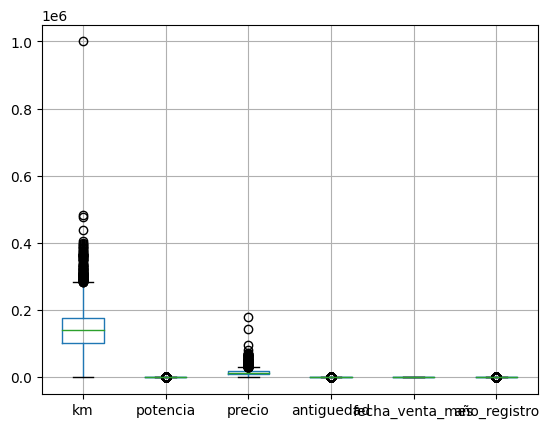

In [75]:
df5.boxplot(list_num)

In [76]:
iqr = df['km'].quantile(0.75) - df['km'].quantile(0.25)
li = df['km'].quantile(0.25) - (1.5 * iqr)
ls = df['km'].quantile(0.75) + (1.5 * iqr)

filtro_ls_plus = df['km'] >= ls
filtro_ls_min = df['km'] <= ls

In [77]:
df5[filtro_ls_min]

<ipython-input-77-99bcdf61ed15>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5[filtro_ls_min]


modelo      km  potencia tipo_gasolina   color   tipo_coche  \
0                   118  140411       100        diesel   black       estate   
1                    M4   13929       317        petrol    grey  convertible   
2                   320  183297       120        diesel   white       estate   
3                   420  128035       135        diesel     red  convertible   
4                   425   97097       160        diesel  silver       estate   
...                 ...     ...       ...           ...     ...          ...   
4810  218 Active Tourer  165707       110        diesel   black          van   
4812    218 Gran Tourer   66770       110        diesel    blue          van   
4814  218 Active Tourer   49832       100        diesel    grey          van   
4815    218 Gran Tourer   19633       110        diesel    grey          van   
4816  218 Active Tourer   27920       110        diesel   brown          van   

      volante_regulable  aire_acondicionado  camara_trasera  \
0                  True                True           False   
1                  True                True           False   
2                 False               False           False   
3                  True                True           False   
4                  True                True           False   
...                 ...                 ...             ...   
4810              False                True           False   
4812              False               False           False   
4814               True                True           False   
4815              False                True           False   
4816              False                True           False   

      elevalunas_electrico  bluetooth   gps  alerta_lim_velocidad  precio  \
0                     True       True  True                  True   11300   
1                    False       True  True                  True   69700   
2                     True      False  True                 False   10200   
3                     True       True  True                  True   25100   
4                    False       True  True                  True   33400   
...                    ...        ...   ...                   ...     ...   
4810                 False      False  True                 False   13600   
4812                 False      False  True                  True   13400   
4814                 False      False  True                  True   17500   
4815                  True       True  True                  True   17000   
4816                 False      False  True                 False   22700   

      antiguedad fecha_venta_nombredia  fecha_venta_mes  año_registro  
0              6                Monday              1.0          2012  
1              5              Thursday              2.0          2013  
2              6              Thursday              2.0          2012  
3              5              Thursday              2.0          2013  
4              5                Sunday              4.0          2013  
...          ...                   ...              ...           ...  
4810          28                Sunday              7.0          1990  
4812          24                Sunday              7.0          1994  
4814           3             Wednesday              8.0          2015  
4815           3              Saturday              9.0          2015  
4816           2              Saturday              9.0          2016  

[4692 rows x 18 columns]

In [78]:
df5[filtro_ls_plus]

<ipython-input-78-44db613662e5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5[filtro_ls_plus]


modelo      km  potencia tipo_gasolina   color   tipo_coche  \
56                320  329173       110        diesel  silver       estate   
100               420  107375       135        diesel   white       estate   
179               320  132746       135        diesel   white       estate   
262               320  186684       120        diesel   brown       estate   
450               318  119162       105        diesel   black       estate   
...               ...     ...       ...           ...     ...          ...   
4609               X5   93095       280        diesel   white   subcompact   
4618               X1  132592       120        diesel   white          suv   
4643               X5   66783       190        diesel   white        coupe   
4724               X3   74091       105        diesel   beige          suv   
4777  218 Gran Tourer   54176       110        diesel   beige  convertible   

      volante_regulable  aire_acondicionado  camara_trasera  \
56                 True               False           False   
100               False                True           False   
179               False                True           False   
262                True               False           False   
450                True                True            True   
...                 ...                 ...             ...   
4609               True                True           False   
4618               True                True            True   
4643               True                True            True   
4724               True                True            True   
4777               True                True           False   

      elevalunas_electrico  bluetooth    gps  alerta_lim_velocidad  precio  \
56                   False       True   True                  True    2300   
100                   True      False   True                  True   23800   
179                  False      False  False                 False   11900   
262                  False      False   True                 False   11400   
450                   True       True   True                 False   11900   
...                    ...        ...    ...                   ...     ...   
4609                  True      False   True                  True   44600   
4618                  True       True   True                  True   16100   
4643                  True       True   True                  True   46400   
4724                  True       True   True                  True   31100   
4777                  True      False   True                  True   15700   

      antiguedad fecha_venta_nombredia  fecha_venta_mes  año_registro  
56            14             Wednesday              8.0          2004  
100            4               Tuesday              5.0          2014  
179            4                Friday              6.0          2014  
262            5              Thursday              3.0          2013  
450            5              Thursday              2.0          2013  
...          ...                   ...              ...           ...  
4609          12             Wednesday              8.0          2006  
4618          11             Wednesday              8.0          2007  
4643          11             Wednesday              8.0          2007  
4724           4             Wednesday              8.0          2014  
4777           3             Wednesday              8.0          2015  

[95 rows x 18 columns]

In [79]:
df5[df5['km'] > 500000]

modelo       km  potencia tipo_gasolina  color tipo_coche  \
3710    118  1000376        90        diesel  white        suv   

      volante_regulable  aire_acondicionado  camara_trasera  \
3710              False               False           False   

      elevalunas_electrico  bluetooth   gps  alerta_lim_velocidad  precio  \
3710                 False      False  True                 False    1400   

      antiguedad fecha_venta_nombredia  fecha_venta_mes  año_registro  
3710          13                Friday              6.0          2005

In [80]:
df5 = df5[df5['km'] < 500000]

<Axes: >

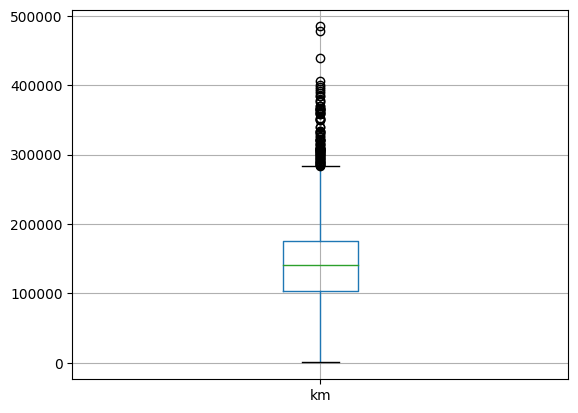

In [81]:
df5.boxplot('km')

### Preprocesamiento

In [82]:
df6 = df5.copy()

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

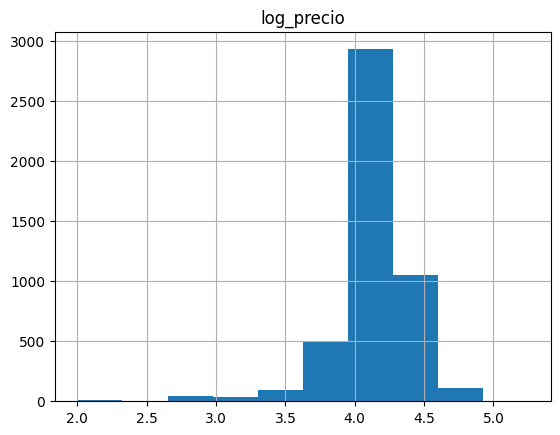

In [83]:
#Generaremos la variable de precio logarítmica para normalizar la variable
df6["log_precio"]=np.log10(df6["precio"])
df6.hist("log_precio")

<Axes: xlabel='log_precio'>

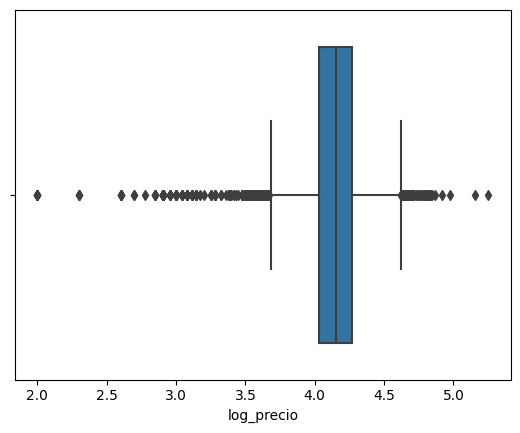

In [84]:
sns.boxplot(x=df6["log_precio"])

In [85]:
df_clean = df6.copy()

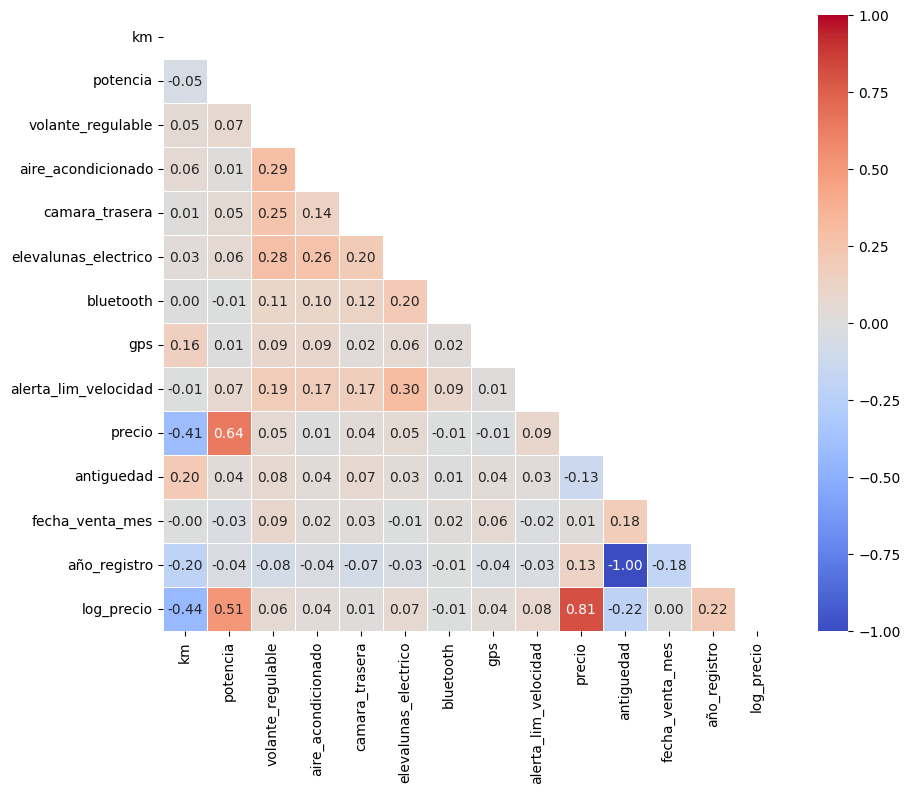

In [86]:
corr = df_clean.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, annot=True, fmt=".2f", linewidths=.5, square=True)
plt.show()

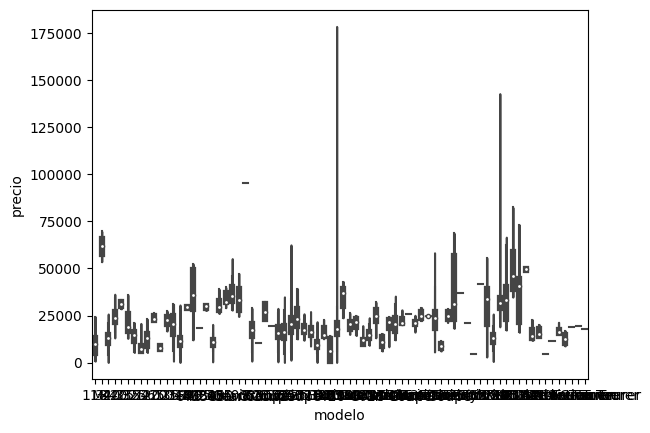

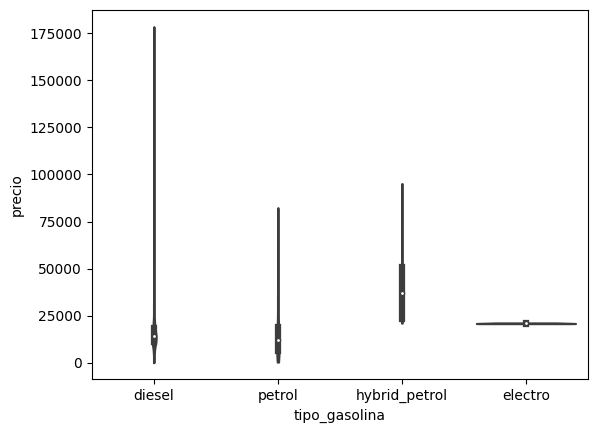

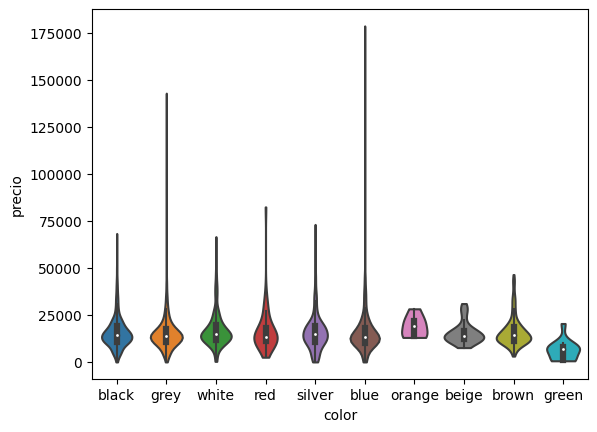

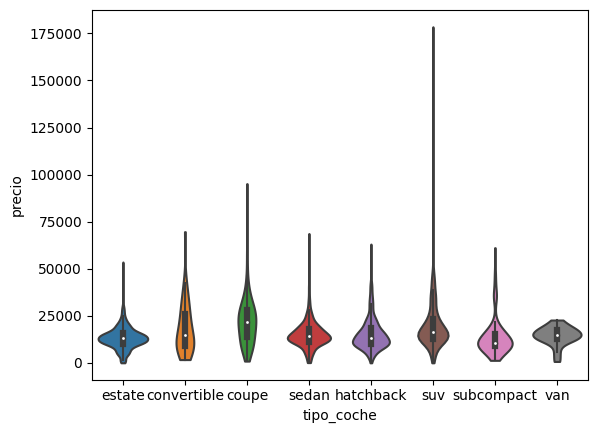

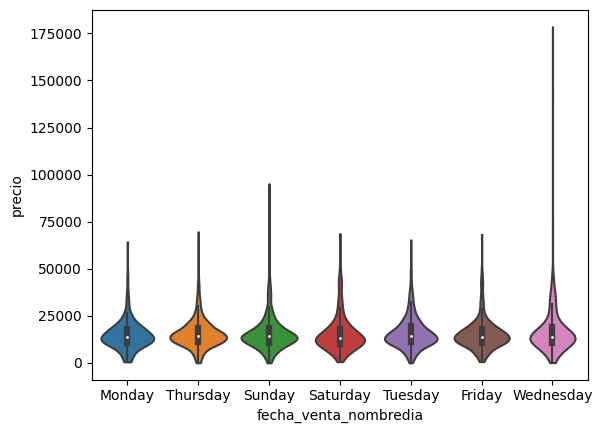

In [87]:
for i in df_clean:
  if (df_clean[i].dtype.kind =="O"):
    plt.figure()
    sns.violinplot(x=i,y="precio", data=df_clean, cut=0)

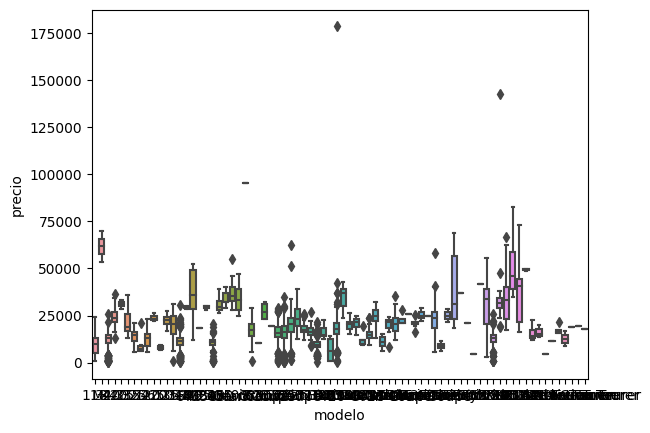

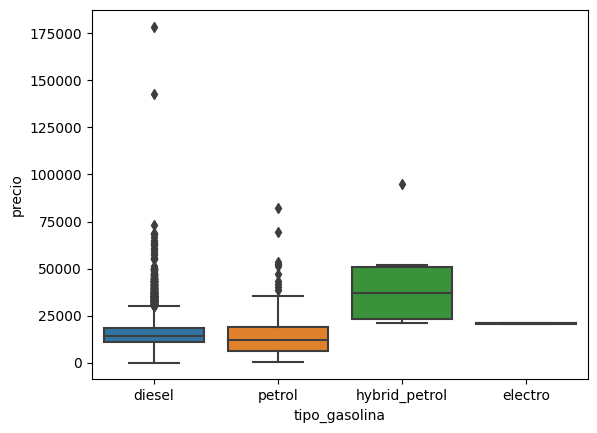

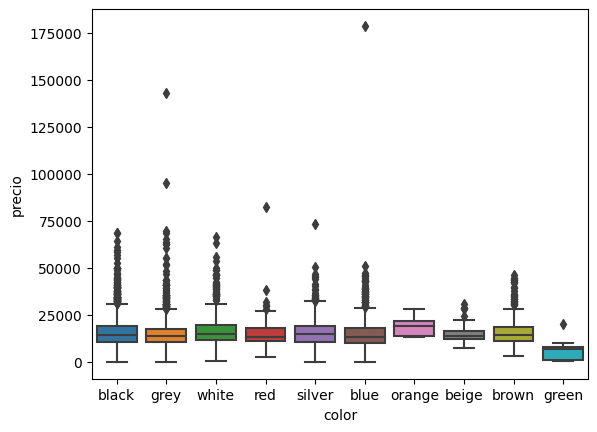

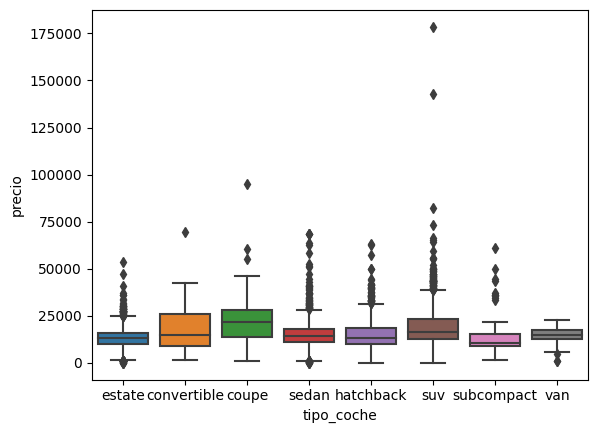

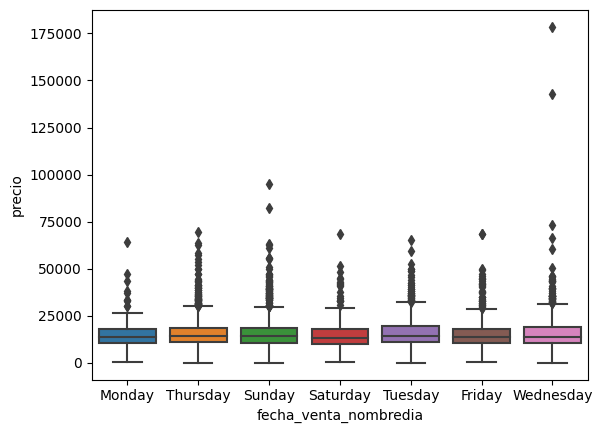

In [88]:
for i in df_clean:
  if (df_clean[i].dtype.kind =="O"):
    plt.figure()
    sns.boxplot(x=i,y="precio", data=df_clean)

In [89]:
df_clean['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '225', 'M235', '316',
       '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8', '330',
       '630', '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', '114', '520 Gran Turismo', '530 Gran Turismo',
       'i3', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [90]:
mapeo_modelos_actualizado = {
    'Serie 1': ['116', '118', '120', '123', '125', '135'],
    'Serie 2': ['214 Gran Tourer', '216 Gran Tourer', '218', '218 Active Tourer', '218 Gran Tourer', '220'],
    'Serie 3': ['316', '318', '320', '323', '325', '328', '330', '335', '340', 'ActiveHybrid 5'],
    'Serie 4': ['418 Gran Coupé', '420', '420 Gran Coupé', '425', '428', '430', '430 Gran Coupé', '435', '435 Gran Coupé', '440', 'ActiveHybrid 3'],
    'Serie 5': ['518', '520', '523', '525', '528', '530', '535', '540', '545', '550', 'M5'],
    'Serie 7': ['730', '735', '740', '750'],
    'Serie 8': ['840', '850'],
    'M': ['M', 'M2', 'M3', 'M4', 'M5', 'M550', 'M6'],
    'X': ['X1', 'X2', 'X3', 'X4', 'X5', 'X6'],
    'Otros': ['Z4', 'i3', 'i8']
}

# Crearemos una nueva columna para ver si mejoramos la distribución
df_clean['categoria_modelo'] = df_clean['modelo'].map({modelo: categoria for categoria, modelos in mapeo_modelos_actualizado.items() for modelo in modelos})

<Axes: xlabel='categoria_modelo', ylabel='precio'>

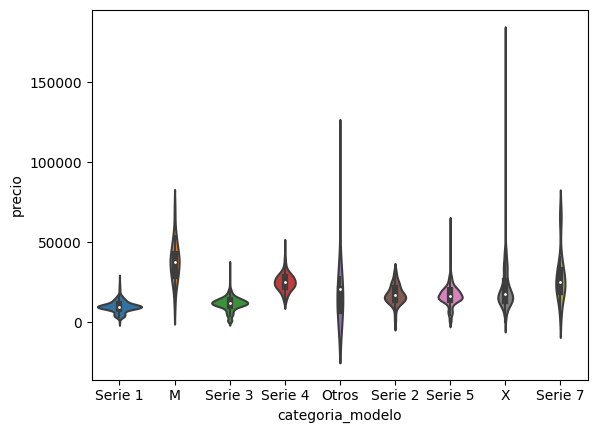

In [91]:
sns.violinplot(x='categoria_modelo',y="precio", data=df_clean)

<Axes: xlabel='categoria_modelo', ylabel='precio'>

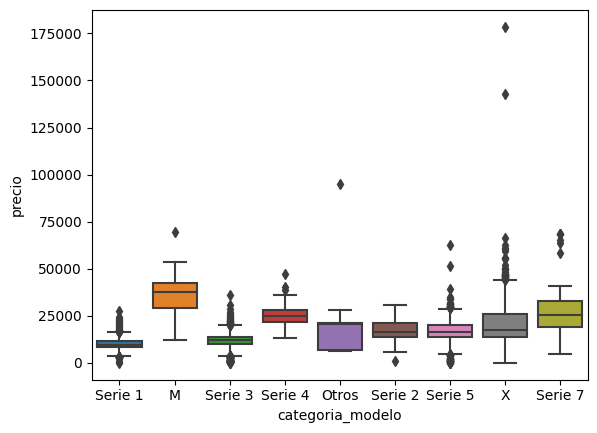

In [92]:
sns.boxplot(x='categoria_modelo',y="precio", data=df_clean)

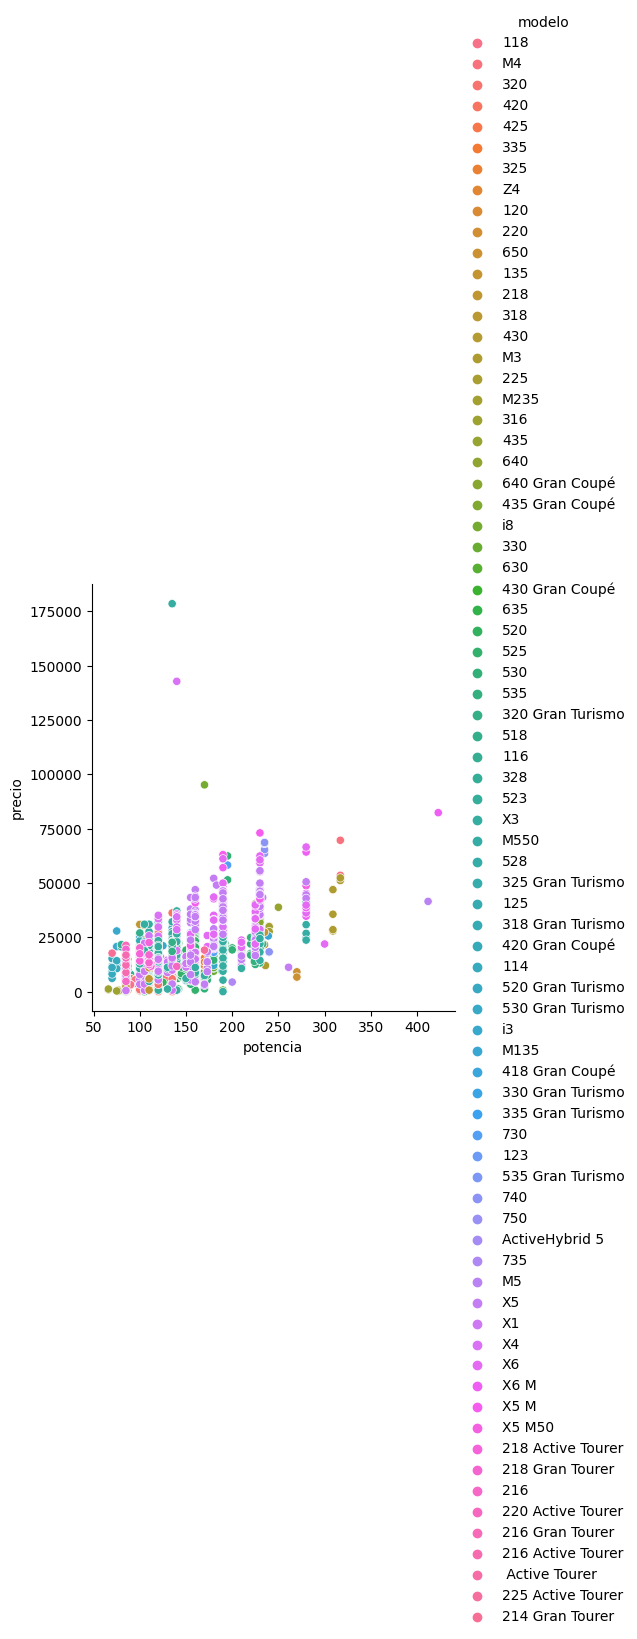

In [93]:
sns.relplot(x='potencia', y= 'precio', hue = 'modelo',data = df_clean);

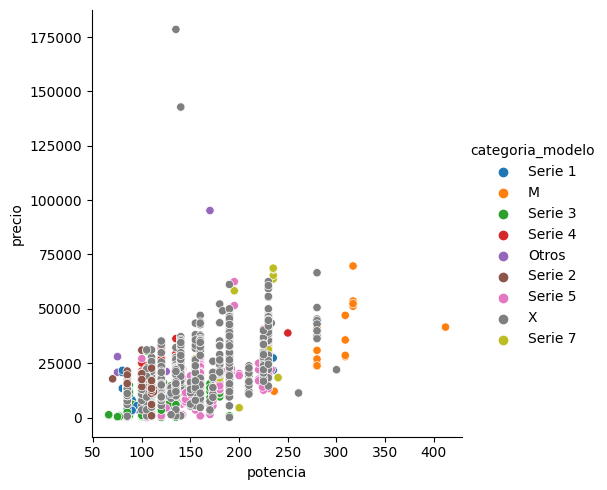

In [94]:
sns.relplot(x='potencia', y= 'precio', hue = 'categoria_modelo',data = df_clean);

In [95]:
#Creemos que no es la mejor idea y la eliminamos
del(df_clean['categoria_modelo'])

In [96]:
df_clean.precio.describe()

count      4788.000000
mean      15817.857143
std        9181.710679
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

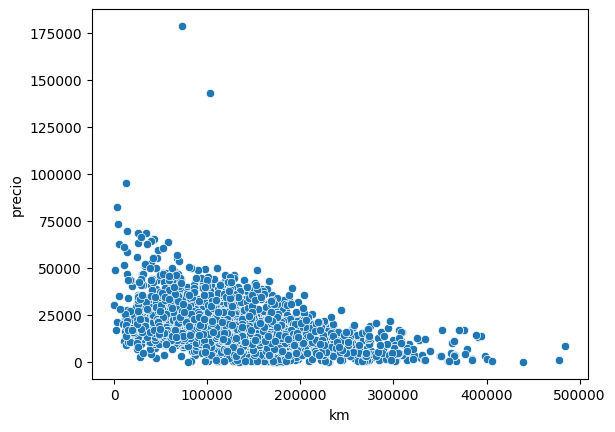

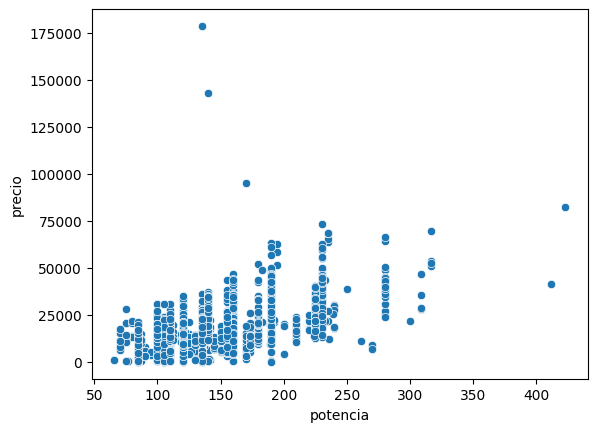

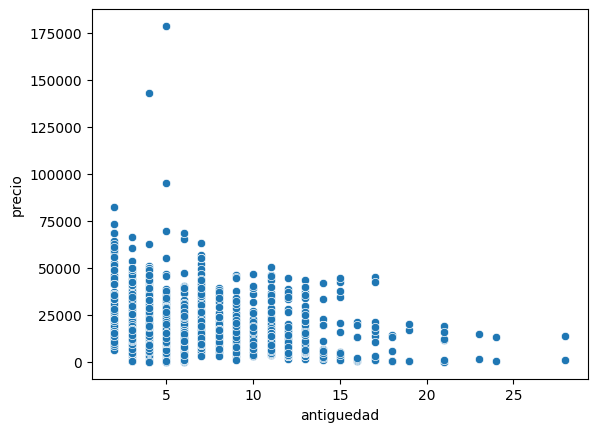

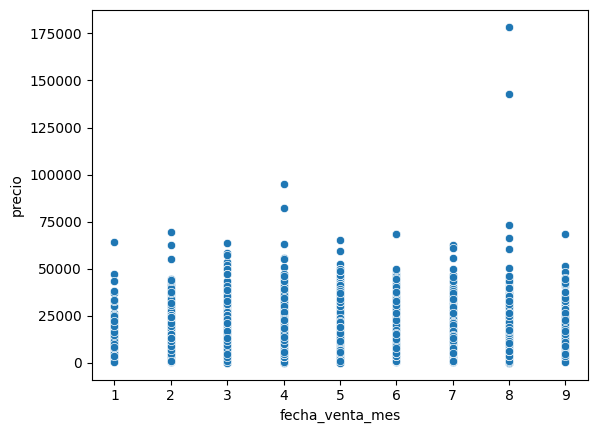

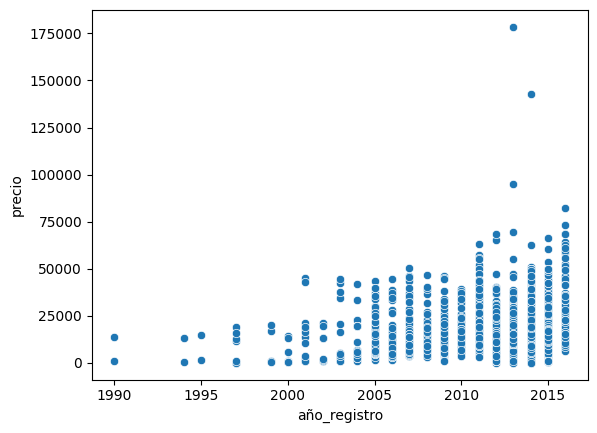

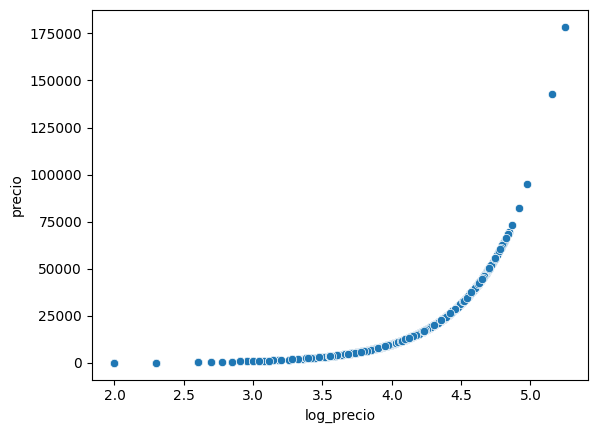

In [97]:
#Visualizaremos todas las variables númericas por precio
for i in df_clean:
  if (df_clean[i].dtype.kind in ("i","f")) and (i!="precio"):
    plt.figure()
    sns.scatterplot(x=i,y="precio", data=df_clean)

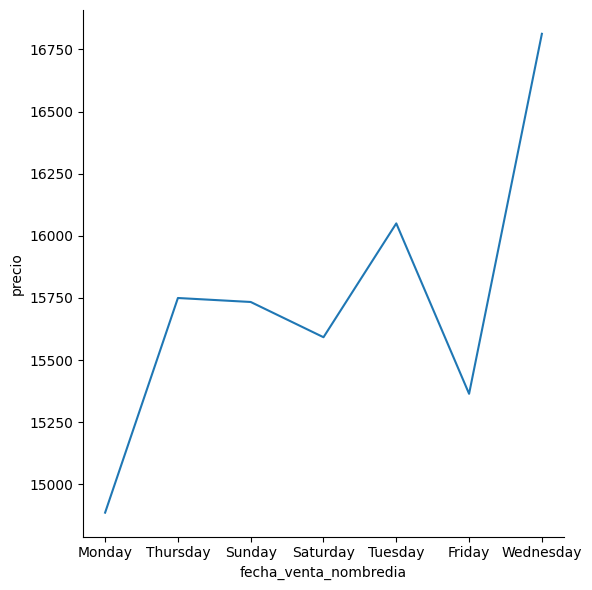

In [98]:
#Visualización de todas las variables temporales
sns.relplot(x= 'fecha_venta_nombredia',y = 'precio',height = 6, kind='line',err_style = None, data = df_clean)

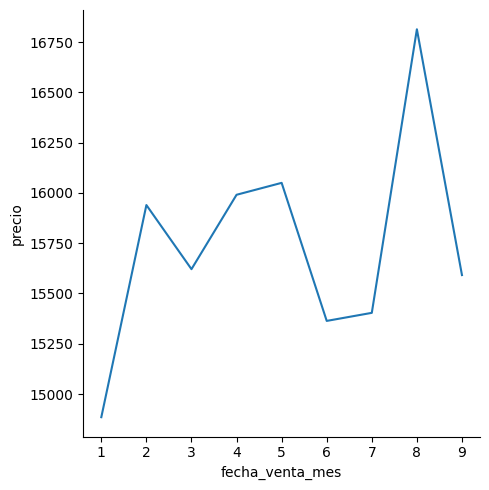

In [99]:
sns.relplot(x= 'fecha_venta_mes',y = 'precio',  kind='line',err_style = None, data = df_clean)

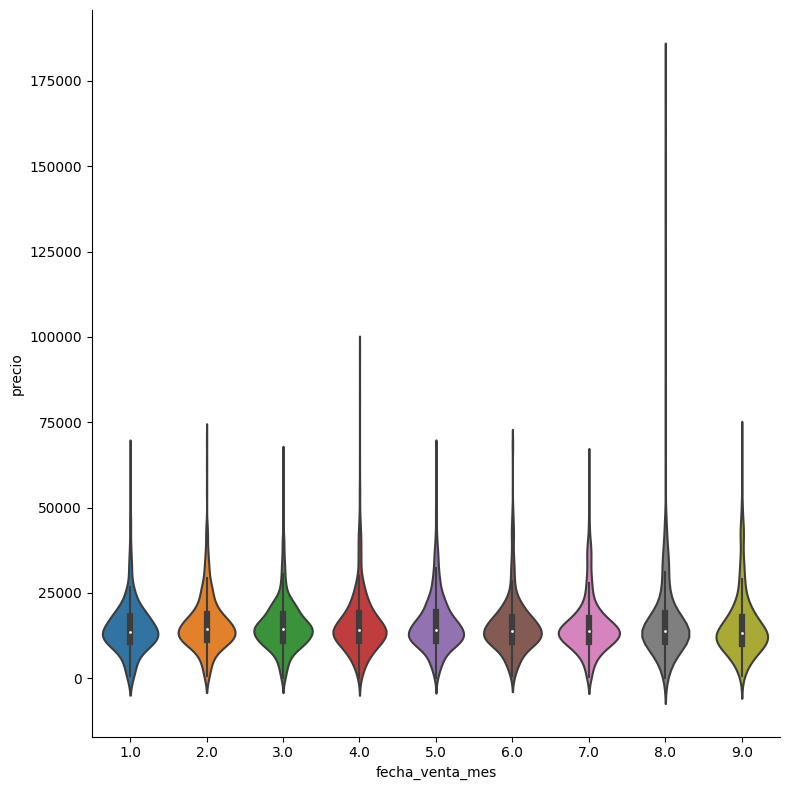

In [100]:
sns.catplot(x= 'fecha_venta_mes',y = 'precio',height=8, kind='violin', data = df_clean)

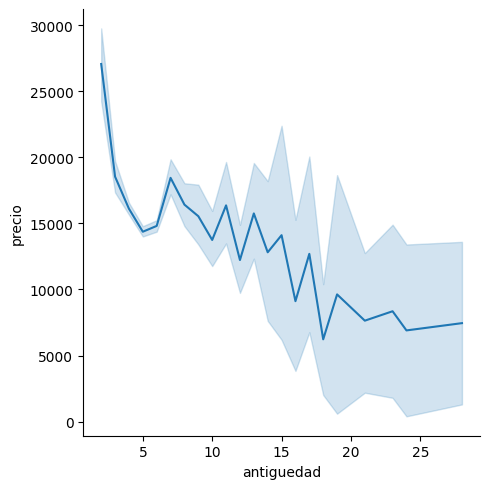

In [101]:
sns.relplot(x='antiguedad', y = 'precio', kind = 'line', data = df_clean)

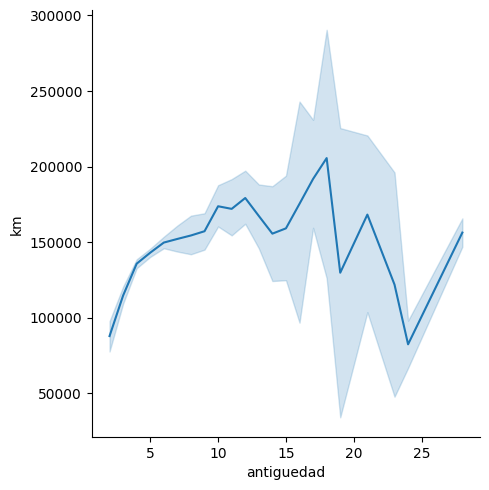

In [102]:
sns.relplot(x='antiguedad', y = 'km', kind = 'line', data = df_clean)

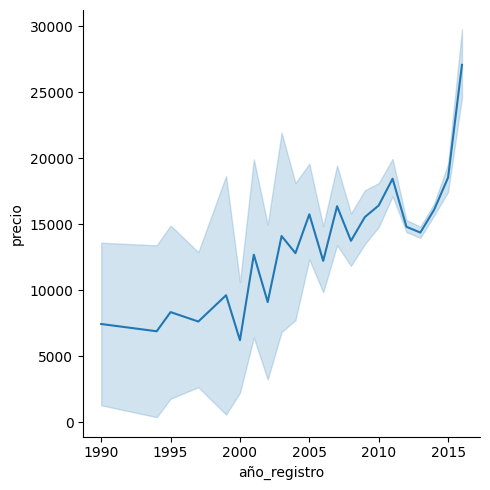

In [103]:
sns.relplot(x='año_registro', y = 'precio', kind = 'line', data = df_clean)

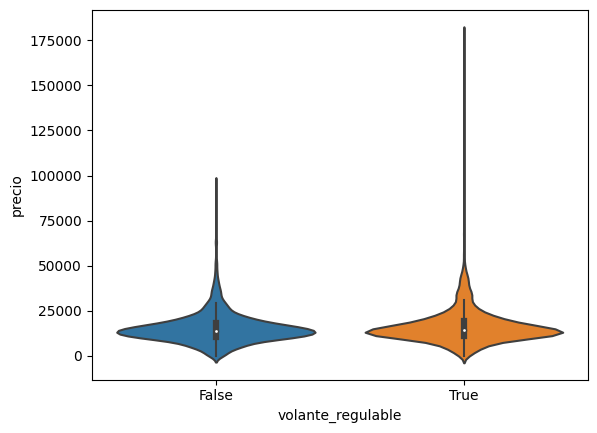

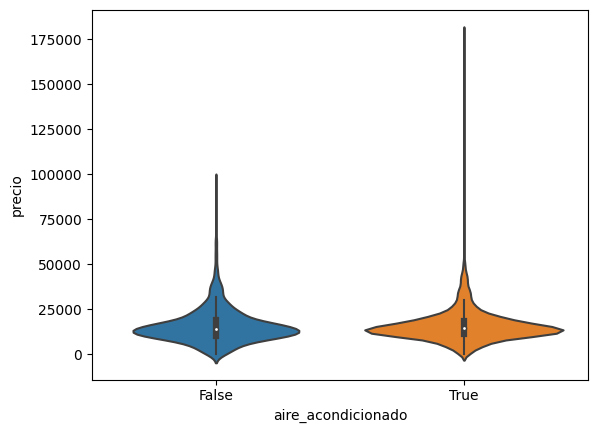

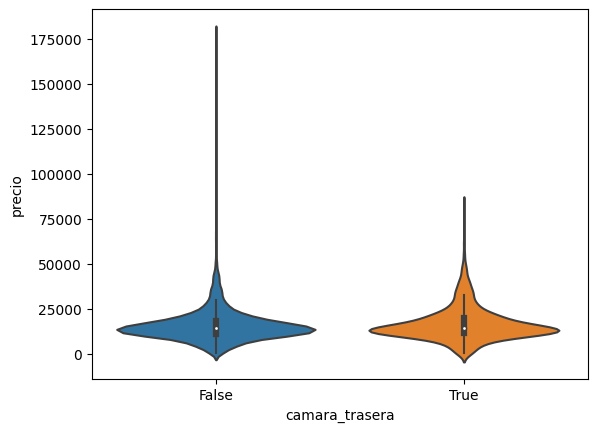

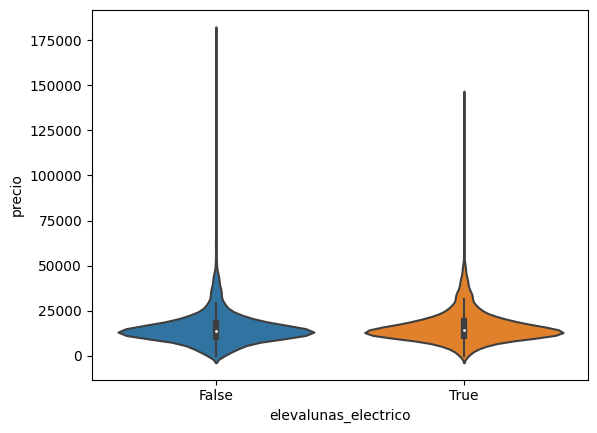

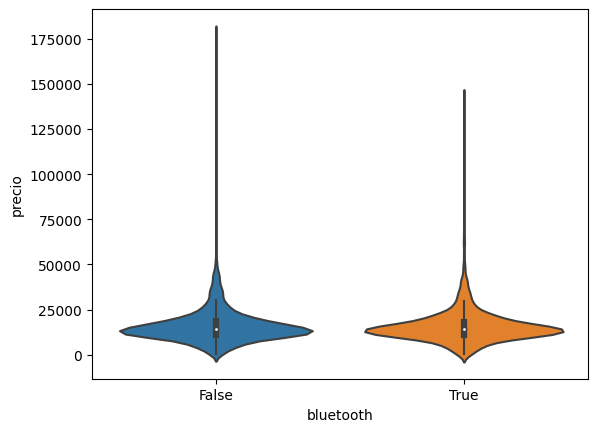

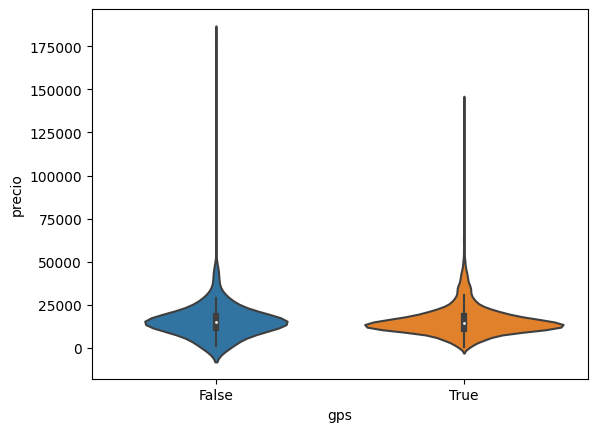

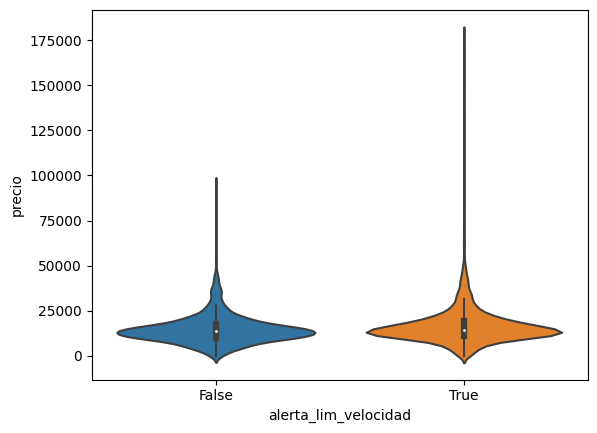

In [107]:
#Visualizamos todas las booleanas por precio
for i in df_clean:
  if (df_clean[i].dtype.kind in ("b")) and (i!="precio"):
    plt.figure()
    sns.violinplot(x=i,y="precio", data=df_clean)

In [108]:
#Eliminaremos las variables booleanas que menos nos sirven
df_clean.drop(['alerta_lim_velocidad', 'gps', 'bluetooth', 'elevalunas_electrico', 'camara_trasera'], axis=1, inplace=True)

In [109]:
#Generaremos de nuevo listas según el tipo de variable pero esta vez excluyendo el target, que será el precio
target = ['precio', 'log_precio']

def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("b")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [110]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_clean)

In [111]:
print(lista_boolean)
print(lista_numericas)
print(lista_categoricas)
df_clean.reset_index(inplace=True, drop=True)

['volante_regulable', 'aire_acondicionado']
['km', 'potencia', 'antiguedad', 'fecha_venta_mes', 'año_registro']
['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'fecha_venta_nombredia']


In [112]:
# Pasaremos la lista de booleanos a int y se convertirá en 0 y 1 para poder generar nuestro modelo.
for i in lista_boolean:
  print(i)
  df_clean[i] = df_clean[i].astype(int)


df_clean[lista_boolean]

volante_regulable
aire_acondicionado


volante_regulable  aire_acondicionado
0                     1                   1
1                     1                   1
2                     0                   0
3                     1                   1
4                     1                   1
...                 ...                 ...
4783                  1                   1
4784                  0                   0
4785                  1                   1
4786                  0                   1
4787                  0                   1

[4788 rows x 2 columns]

In [113]:
#Seguiremos con las categoricas
df_prep=pd.get_dummies(data=df_clean,
                               columns=lista_categoricas
                               )
df_prep

km  potencia  volante_regulable  aire_acondicionado  precio  \
0     140411       100                  1                   1   11300   
1      13929       317                  1                   1   69700   
2     183297       120                  0                   0   10200   
3     128035       135                  1                   1   25100   
4      97097       160                  1                   1   33400   
...      ...       ...                ...                 ...     ...   
4783   81230       100                  1                   1   14200   
4784   66770       110                  0                   0   13400   
4785   49832       100                  1                   1   17500   
4786   19633       110                  0                   1   17000   
4787   27920       110                  0                   1   22700   

      antiguedad  fecha_venta_mes  año_registro  log_precio  \
0              6              1.0          2012    4.053078   
1              5              2.0          2013    4.843233   
2              6              2.0          2012    4.008600   
3              5              2.0          2013    4.399674   
4              5              4.0          2013    4.523746   
...          ...              ...           ...         ...   
4783           3              7.0          2015    4.152288   
4784          24              7.0          1994    4.127105   
4785           3              8.0          2015    4.243038   
4786           3              9.0          2015    4.230449   
4787           2              9.0          2016    4.356026   

      modelo_ Active Tourer  ...  tipo_coche_subcompact  tipo_coche_suv  \
0                         0  ...                      0               0   
1                         0  ...                      0               0   
2                         0  ...                      0               0   
3                         0  ...                      0               0   
4                         0  ...                      0               0   
...                     ...  ...                    ...             ...   
4783                      0  ...                      0               0   
4784                      0  ...                      0               0   
4785                      0  ...                      0               0   
4786                      0  ...                      0               0   
4787                      0  ...                      0               0   

      tipo_coche_van  fecha_venta_nombredia_Friday  \
0                  0                             0   
1                  0                             0   
2                  0                             0   
3                  0                             0   
4                  0                             0   
...              ...                           ...   
4783               1                             0   
4784               1                             0   
4785               1                             0   
4786               1                             0   
4787               1                             0   

      fecha_venta_nombredia_Monday  fecha_venta_nombredia_Saturday  \
0                                1                               0   
1                                0                               0   
2                                0                               0   
3                                0                               0   
4                                0                               0   
...                            ...                             ...   
4783                             0                               0   
4784                             0                               0   
4785                             0                               0   
4786                             0                               1   
4787                             0                      

In [114]:
#Para las númericas usaremos un. escalado númerico que las categorizará entre el 0 y el 1
def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_prep[variable_transformar]=minMaxResultado.fit_transform(df_prep[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [115]:
for i in lista_numericas:
  globals()[f"minMax_{i}"] = minmaxTransformacion(i)

In [116]:
df_prep.head()

km  potencia  volante_regulable  aire_acondicionado  precio  \
0  0.289039  0.095238                  1                   1   11300   
1  0.027787  0.703081                  1                   1   69700   
2  0.377621  0.151261                  0                   0   10200   
3  0.263476  0.193277                  1                   1   25100   
4  0.199573  0.263305                  1                   1   33400   

   antiguedad  fecha_venta_mes  año_registro  log_precio  \
0    0.153846            0.000      0.846154    4.053078   
1    0.115385            0.125      0.884615    4.843233   
2    0.153846            0.125      0.846154    4.008600   
3    0.115385            0.125      0.884615    4.399674   
4    0.115385            0.375      0.884615    4.523746   

   modelo_ Active Tourer  ...  tipo_coche_subcompact  tipo_coche_suv  \
0                      0  ...                      0               0   
1                      0  ...                      0               0   
2                      0  ...                      0               0   
3                      0  ...                      0               0   
4                      0  ...                      0               0   

   tipo_coche_van  fecha_venta_nombredia_Friday  fecha_venta_nombredia_Monday  \
0               0                             0                             1   
1               0                             0                             0   
2               0                             0                             0   
3               0                             0                             0   
4               0                             0                             0   

   fecha_venta_nombredia_Saturday  fecha_venta_nombredia_Sunday  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             1   

   fecha_venta_nombredia_Thursday  fecha_venta_nombredia_Tuesday  \
0                               0                              0   
1                               1                              0   
2                               1                              0   
3                               1                              0   
4                               0                              0   

   fecha_venta_nombredia_Wednesday  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  

[5 rows x 114 columns]

In [117]:
#Nos guardaremos el dataset en un pickle
df_prep.to_pickle('/content/drive/MyDrive/Colab Notebooks/df_bmw_prep.pkl')

In [118]:
#De nuevo comprovaremos la correlación
corr2 = df_prep.corr()
corr3=corr2.where(np.triu(np.ones(corr2.shape), k=1).astype(bool))

In [119]:
corr3.stack()

km                              potencia                          -0.049169
                                volante_regulable                  0.049558
                                aire_acondicionado                 0.056444
                                precio                            -0.412774
                                antiguedad                         0.204840
                                                                     ...   
fecha_venta_nombredia_Sunday    fecha_venta_nombredia_Tuesday     -0.263905
                                fecha_venta_nombredia_Wednesday   -0.203339
fecha_venta_nombredia_Thursday  fecha_venta_nombredia_Tuesday     -0.263036
                                fecha_venta_nombredia_Wednesday   -0.202669
fecha_venta_nombredia_Tuesday   fecha_venta_nombredia_Wednesday   -0.156423
Length: 6441, dtype: float64

In [120]:
corr4=corr3.unstack().dropna()
corr5 = corr4.sort_values()
corr5

año_registro                    antiguedad                 -1.000000
tipo_gasolina_petrol            tipo_gasolina_diesel       -0.976284
fecha_venta_nombredia_Thursday  fecha_venta_mes            -0.633568
log_precio                      km                         -0.436106
precio                          km                         -0.412774
                                                              ...   
log_precio                      potencia                    0.508766
tipo_coche_van                  modelo_218 Active Tourer    0.575776
precio                          potencia                    0.641146
log_precio                      precio                      0.808485
tipo_gasolina_electro           modelo_i3                   0.865935
Length: 6441, dtype: float64

In [121]:
corr2.style.background_gradient(cmap='coolwarm')

In [122]:
df_prep.T

0             1             2     \
km                                   0.289039      0.027787      0.377621   
potencia                             0.095238      0.703081      0.151261   
volante_regulable                    1.000000      1.000000      0.000000   
aire_acondicionado                   1.000000      1.000000      0.000000   
precio                           11300.000000  69700.000000  10200.000000   
...                                       ...           ...           ...   
fecha_venta_nombredia_Saturday       0.000000      0.000000      0.000000   
fecha_venta_nombredia_Sunday         0.000000      0.000000      0.000000   
fecha_venta_nombredia_Thursday       0.000000      1.000000      1.000000   
fecha_venta_nombredia_Tuesday        0.000000      0.000000      0.000000   
fecha_venta_nombredia_Wednesday      0.000000      0.000000      0.000000   

                                         3             4             5     \
km                                   0.263476      0.199573      0.313703   
potencia                             0.193277      0.263305      0.445378   
volante_regulable                    1.000000      1.000000      1.000000   
aire_acondicionado                   1.000000      1.000000      1.000000   
precio                           25100.000000  33400.000000  17100.000000   
...                                       ...           ...           ...   
fecha_venta_nombredia_Saturday       0.000000      0.000000      0.000000   
fecha_venta_nombredia_Sunday         0.000000      1.000000      0.000000   
fecha_venta_nombredia_Thursday       1.000000      0.000000      1.000000   
fecha_venta_nombredia_Tuesday        0.000000      0.000000      0.000000   
fecha_venta_nombredia_Wednesday      0.000000      0.000000      0.000000   

                                         6            7            8     \
km                                   0.422901     0.237709     0.254906   
potencia                             0.221289     0.109244     0.165266   
volante_regulable                    1.000000     1.000000     1.000000   
aire_acondicionado                   1.000000     1.000000     0.000000   
precio                           12400.000000  6100.000000  6200.000000   
...                                       ...          ...          ...   
fecha_venta_nombredia_Saturday       0.000000     0.000000     0.000000   
fecha_venta_nombredia_Sunday         0.000000     0.000000     0.000000   
fecha_venta_nombredia_Thursday       1.000000     1.000000     1.000000   
fecha_venta_nombredia_Tuesday        0.000000     0.000000     0.000000   
fecha_venta_nombredia_Wednesday      0.000000     0.000000     0.000000   

                                         9     ...          4778  \
km                                   0.287242  ...      0.088408   
potencia                             0.193277  ...      0.095238   
volante_regulable                    0.000000  ...      0.000000   
aire_acondicionado                   0.000000  ...      0.000000   
precio                           17300.000000  ...  17100.000000   
...                                       ...  ...           ...   
fecha_venta_nombredia_Saturday       0.000000  ...      0.000000   
fecha_venta_nombredia_Sunday         0.000000  ...      0.000000   
fecha_venta_nombredia_Thursday       1.000000  ...      0.000000   
fecha_venta_nombredia_Tuesday        0.000000  ...      0.000000   
fecha_venta_nombredia_Wednesday      0.000000  ...      1.000000   

                                         4779          4780          4781  \
km                                   0.050618      0.029035      0.097712   
potencia                             0.095238      0.053221      0.123249   
volante_regulable                    1.000000      1.000000      0.000000   
aire_acondicionado                   1.000000      1.000000      1.000000   
precio                           20200.000000  16900.000000  14900.000000   
...        

In [123]:
for column in df_prep.columns:
    print(column)

km
potencia
volante_regulable
aire_acondicionado
precio
antiguedad
fecha_venta_mes
año_registro
log_precio
modelo_ Active Tourer
modelo_114
modelo_116
modelo_118
modelo_120
modelo_123
modelo_125
modelo_135
modelo_214 Gran Tourer
modelo_216
modelo_216 Active Tourer
modelo_216 Gran Tourer
modelo_218
modelo_218 Active Tourer
modelo_218 Gran Tourer
modelo_220
modelo_220 Active Tourer
modelo_225
modelo_225 Active Tourer
modelo_316
modelo_318
modelo_318 Gran Turismo
modelo_320
modelo_320 Gran Turismo
modelo_325
modelo_325 Gran Turismo
modelo_328
modelo_330
modelo_330 Gran Turismo
modelo_335
modelo_335 Gran Turismo
modelo_418 Gran Coupé
modelo_420
modelo_420 Gran Coupé
modelo_425
modelo_430
modelo_430 Gran Coupé
modelo_435
modelo_435 Gran Coupé
modelo_518
modelo_520
modelo_520 Gran Turismo
modelo_523
modelo_525
modelo_528
modelo_530
modelo_530 Gran Turismo
modelo_535
modelo_535 Gran Turismo
modelo_630
modelo_635
modelo_640
modelo_640 Gran Coupé
modelo_650
modelo_730
modelo_735
modelo_740
mode

In [127]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Columns: 114 entries, km to fecha_venta_nombredia_Wednesday
dtypes: float64(6), int64(3), uint8(105)
memory usage: 827.7 KB


In [125]:
df_prep.head(5)

km  potencia  volante_regulable  aire_acondicionado  precio  \
0  0.289039  0.095238                  1                   1   11300   
1  0.027787  0.703081                  1                   1   69700   
2  0.377621  0.151261                  0                   0   10200   
3  0.263476  0.193277                  1                   1   25100   
4  0.199573  0.263305                  1                   1   33400   

   antiguedad  fecha_venta_mes  año_registro  log_precio  \
0    0.153846            0.000      0.846154    4.053078   
1    0.115385            0.125      0.884615    4.843233   
2    0.153846            0.125      0.846154    4.008600   
3    0.115385            0.125      0.884615    4.399674   
4    0.115385            0.375      0.884615    4.523746   

   modelo_ Active Tourer  ...  tipo_coche_subcompact  tipo_coche_suv  \
0                      0  ...                      0               0   
1                      0  ...                      0               0   
2                      0  ...                      0               0   
3                      0  ...                      0               0   
4                      0  ...                      0               0   

   tipo_coche_van  fecha_venta_nombredia_Friday  fecha_venta_nombredia_Monday  \
0               0                             0                             1   
1               0                             0                             0   
2               0                             0                             0   
3               0                             0                             0   
4               0                             0                             0   

   fecha_venta_nombredia_Saturday  fecha_venta_nombredia_Sunday  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             1   

   fecha_venta_nombredia_Thursday  fecha_venta_nombredia_Tuesday  \
0                               0                              0   
1                               1                              0   
2                               1                              0   
3                               1                              0   
4                               0                              0   

   fecha_venta_nombredia_Wednesday  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  

[5 rows x 114 columns]

In [129]:
pd.set_option('display.max_rows', None)

In [130]:
print(df_prep.dtypes)

km                                 float64
potencia                           float64
volante_regulable                    int64
aire_acondicionado                   int64
precio                               int64
antiguedad                         float64
fecha_venta_mes                    float64
año_registro                       float64
log_precio                         float64
modelo_ Active Tourer                uint8
modelo_114                           uint8
modelo_116                           uint8
modelo_118                           uint8
modelo_120                           uint8
modelo_123                           uint8
modelo_125                           uint8
modelo_135                           uint8
modelo_214 Gran Tourer               uint8
modelo_216                           uint8
modelo_216 Active Tourer             uint8
modelo_216 Gran Tourer               uint8
modelo_218                           uint8
modelo_218 Active Tourer             uint8
modelo_218 